In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from mgtwr.gtwr import GTWR, MGTWR,GTWRResults

# 1.所需要的数据格式

In [50]:
np.random.seed(10)
u = np.array([(i-1)%12 for i in range(1,1729)]).reshape(-1,1)
v = np.array([((i-1)%144)//12 for i in range(1,1729)]).reshape(-1,1)
t = np.array([(i-1)//144 for i in range(1,1729)]).reshape(-1,1)
x1 = np.random.uniform(0,1,(1728,1))
x2 = np.random.uniform(0,1,(1728,1))
epsilon = np.random.randn(1728,1)
beta0 = 5
beta1 = 3 + (u + v + t)/6
beta2 = 3+((36-(6-u)**2)*(36-(6-v)**2)*(36-(6-t)**2))/128
y = beta0 + beta1 * x1 + beta2 * x2 + epsilon
coords = np.hstack([u,v])
X = np.hstack([x1,x2])

In [58]:
df = np.hstack([coords,t,X,y])
df = pd.DataFrame(df)
df.rename(columns={0:'lng',1:'lat',2:'t',3:'x1',4:'x2',5:'y'},inplace=True)
df.to_csv('Data_example.csv',encoding='gbk',index=False)

## 1.1 关于经纬度及距离度量的一些源码分析

In [1]:
# 打印出计算距离的向量
# 重新载入修改后的代码
import numpy as np
import pandas as pd
import sys
sys.path.append('./mgtwr-1.0.4/')
import new_mgtwr
from new_mgtwr import gtwr
import importlib
importlib.reload(gtwr)

<module 'new_mgtwr.gtwr' from './mgtwr-1.0.4\\new_mgtwr\\gtwr.py'>

In [2]:
np.random.seed(10)
u = np.array([(i-1)%12 for i in range(1,1729)]).reshape(-1,1)
v = np.array([((i-1)%144)//12 for i in range(1,1729)]).reshape(-1,1)
t = np.array([(i-1)//144 for i in range(1,1729)]).reshape(-1,1)
x1 = np.random.uniform(0,1,(1728,1))
x2 = np.random.uniform(0,1,(1728,1))
epsilon = np.random.randn(1728,1)
beta0 = 5
beta1 = 3 + (u + v + t)/6
beta2 = 3+((36-(6-u)**2)*(36-(6-v)**2)*(36-(6-t)**2))/128
y = beta0 + beta1 * x1 + beta2 * x2 + epsilon
coords = np.hstack([u,v])
X = np.hstack([x1,x2])
# 拟合GTWR
gtwr = gtwr.GTWR(coords=coords, t=t, y=y, X=X, bw=0.8, tau=0.7, kernel='gaussian', fixed=True,constant=True).fit()
print(gtwr.R2)

coords_new: 
 [[ 0.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 2.          0.          0.        ]
 ...
 [ 9.         11.          9.20326029]
 [10.         11.          9.20326029]
 [11.         11.          9.20326029]]
distance: 
 [ 0.          1.          2.         ... 16.93221781 17.48427865
 18.0748444 ]
coords_new: 
 [[ 0.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 2.          0.          0.        ]
 ...
 [ 9.         11.          9.20326029]
 [10.         11.          9.20326029]
 [11.         11.          9.20326029]]
distance: 
 [ 0.          1.          2.         ... 16.93221781 17.48427865
 18.0748444 ]
coords_new: 
 [[ 0.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 2.          0.          0.        ]
 ...
 [ 9.         11.          9.20326029]
 [10.         11.          9.20326029]
 [11.         11.          9.20326029]]
distance: 
 [ 0.          1.          2.         ... 16.

 [ 1.          1.41421356  2.23606798 ... 16.30030675 16.87305544
 17.48427865]
coords_new: 
 [[ 0.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 2.          0.          0.        ]
 ...
 [ 9.         11.          9.20326029]
 [10.         11.          9.20326029]
 [11.         11.          9.20326029]]
distance: 
 [ 1.          1.41421356  2.23606798 ... 16.30030675 16.87305544
 17.48427865]
coords_new: 
 [[ 0.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 2.          0.          0.        ]
 ...
 [ 9.         11.          9.20326029]
 [10.         11.          9.20326029]
 [11.         11.          9.20326029]]
distance: 
 [ 1.          1.41421356  2.23606798 ... 16.30030675 16.87305544
 17.48427865]
coords_new: 
 [[ 0.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 2.          0.          0.        ]
 ...
 [ 9.         11.          9.20326029]
 [10.         11.          9.20326029]
 [11.         11

 [[ 0.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 2.          0.          0.        ]
 ...
 [ 9.         11.          9.20326029]
 [10.         11.          9.20326029]
 [11.         11.          9.20326029]]
distance: 
 [ 2.82842712  2.23606798  2.         ... 14.65264481 15.15585695
 15.70668647]
coords_new: 
 [[ 0.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 2.          0.          0.        ]
 ...
 [ 9.         11.          9.20326029]
 [10.         11.          9.20326029]
 [11.         11.          9.20326029]]
distance: 
 [ 2.82842712  2.23606798  2.         ... 14.65264481 15.15585695
 15.70668647]
coords_new: 
 [[ 0.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 2.          0.          0.        ]
 ...
 [ 9.         11.          9.20326029]
 [10.         11.          9.20326029]
 [11.         11.          9.20326029]]
distance: 
 [ 3.60555128  2.82842712  2.23606798 ... 14.20211252 14.6

coords_new: 
 [[ 0.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 2.          0.          0.        ]
 ...
 [ 9.         11.          9.20326029]
 [10.         11.          9.20326029]
 [11.         11.          9.20326029]]
distance: 
 [ 5.83095189  5.          4.24264069 ... 12.83354978 13.17952958
 13.59043781]
coords_new: 
 [[ 0.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 2.          0.          0.        ]
 ...
 [ 9.         11.          9.20326029]
 [10.         11.          9.20326029]
 [11.         11.          9.20326029]]
distance: 
 [ 6.70820393  5.83095189  5.         ... 12.55786606 12.83354978
 13.17952958]
coords_new: 
 [[ 0.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 2.          0.          0.        ]
 ...
 [ 9.         11.          9.20326029]
 [10.         11.          9.20326029]
 [11.         11.          9.20326029]]
distance: 
 [ 6.70820393  5.83095189  5.         ... 12.

 [[ 0.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 2.          0.          0.        ]
 ...
 [ 9.         11.          9.20326029]
 [10.         11.          9.20326029]
 [11.         11.          9.20326029]]
distance: 
 [ 8.94427191  8.06225775  7.21110255 ... 11.60603291 11.73456433
 11.94571053]
coords_new: 
 [[ 0.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 2.          0.          0.        ]
 ...
 [ 9.         11.          9.20326029]
 [10.         11.          9.20326029]
 [11.         11.          9.20326029]]
distance: 
 [ 8.94427191  8.06225775  7.21110255 ... 11.60603291 11.73456433
 11.94571053]
coords_new: 
 [[ 0.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 2.          0.          0.        ]
 ...
 [ 9.         11.          9.20326029]
 [10.         11.          9.20326029]
 [11.         11.          9.20326029]]
distance: 
 [ 9.8488578   8.94427191  8.06225775 ... 11.56287162 11.6

 [11.         11.          9.20326029]]
distance: 
 [ 6.          6.08276253  6.32455532 ... 13.80941708 14.48102206
 15.18881167]
coords_new: 
 [[ 0.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 2.          0.          0.        ]
 ...
 [ 9.         11.          9.20326029]
 [10.         11.          9.20326029]
 [11.         11.          9.20326029]]
distance: 
 [ 6.          6.08276253  6.32455532 ... 13.80941708 14.48102206
 15.18881167]
coords_new: 
 [[ 0.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 2.          0.          0.        ]
 ...
 [ 9.         11.          9.20326029]
 [10.         11.          9.20326029]
 [11.         11.          9.20326029]]
distance: 
 [ 6.          6.08276253  6.32455532 ... 13.80941708 14.48102206
 15.18881167]
coords_new: 
 [[ 0.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 2.          0.          0.        ]
 ...
 [ 9.         11.          9.20326029]
 [10

KeyboardInterrupt: 

In [3]:
print(np.hstack([coords,t]))

[[ 0  0  0]
 [ 1  0  0]
 [ 2  0  0]
 ...
 [ 9 11 11]
 [10 11 11]
 [11 11 11]]


**通过上述分析已经证明：gtwr包输入coords和t，计算时空权重矩阵时，计算方式与师姐论文中所写是一致的，即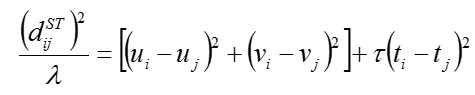，是直接用欧式距离计算的，因此输入经纬度是不正确的，需要先将经纬度修改成欧式距离的点输入才可以。**

# 2.GTWR代码实现
**这部分代码实现使用的是mgtwr-1.0.4这个包**
## 2.1随机生成一些实战数据
包括坐标、自变量、因变量、时间序列

In [16]:
np.random.seed(10)
u = np.array([(i-1)%12 for i in range(1,1729)]).reshape(-1,1)
v = np.array([((i-1)%144)//12 for i in range(1,1729)]).reshape(-1,1)
t = np.array([(i-1)//144 for i in range(1,1729)]).reshape(-1,1)
x1 = np.random.uniform(0,1,(1728,1))
x2 = np.random.uniform(0,1,(1728,1))
epsilon = np.random.randn(1728,1)
beta0 = 5
beta1 = 3 + (u + v + t)/6
beta2 = 3+((36-(6-u)**2)*(36-(6-v)**2)*(36-(6-t)**2))/128
y = beta0 + beta1 * x1 + beta2 * x2 + epsilon
coords = np.hstack([u,v])
X = np.hstack([x1,x2])

In [20]:
print("coords:\n",coords,coords.shape)
print("t:\n",t,t.shape)
print("X:\n",X ,X.shape)
print("y:\n",y,y.shape)

coords:
 [[ 0  0]
 [ 1  0]
 [ 2  0]
 ...
 [ 9 11]
 [10 11]
 [11 11]] (1728, 2)
t:
 [[ 0]
 [ 0]
 [ 0]
 ...
 [11]
 [11]
 [11]] (1728, 1)
X:
 [[0.77132064 0.89509824]
 [0.02075195 0.63372887]
 [0.63364823 0.46276849]
 ...
 [0.22233723 0.05576403]
 [0.63305281 0.82517067]
 [0.05729903 0.87299008]] (1728, 2)
y:
 [[10.65655043]
 [ 5.69275413]
 [ 7.63470055]
 ...
 [ 8.84411885]
 [27.93264986]
 [16.93148075]] (1728, 1)


## 2.2通过黄金分割法则去搜索最佳的bw和tau两个参数

In [32]:
# 得到最优的bw和tau两个参数
from mgtwr.sel_bws import Sel_bws
sel = Sel_bws(coords, t, y, X, kernel = 'gaussian', fixed = True)
bw, tau = sel.search(bw_max = 40, tau_max = 5, verbose = True)
print(bw,tau)

bw, tau, score: 15.3 4.9 18744.792990631904
bw, tau, score: 9.4 4.9 18632.45981380435
bw, tau, score: 5.8 4.9 18316.139592165968
bw, tau, score: 3.6 4.9 17661.030394977093
bw, tau, score: 2.2 4.9 16352.432741417268
bw, tau, score: 1.4 3.8 14817.811620052911
bw, tau, score: 0.8 1.0 13749.050577638549
bw, tau, score: 0.8 4.9 13749.050577638549
bw, tau, score: 0.8 0.2 13749.050577638549
bw, tau, score: 0.8 2.3 13749.050577638549
bw, tau, score: 0.8 0.7 13749.050577638549
bw, tau, score: 0.8 0.7 13749.050577638549
0.8 0.7


## 2.3拟合GTWR模型

In [5]:
gtwr = GTWR(coords=coords, t=t, y=y, X=X, bw=0.8, tau=0.7, kernel='gaussian', fixed=True,constant=True).fit()
print(gtwr.R2)
print("coords:\n",gtwr.coords,gtwr.coords.shape)
print("t:\n",gtwr.t,gtwr.t.shape)
print("X:\n",gtwr.X ,gtwr.X.shape)
print("y:\n",gtwr.y,gtwr.y.shape)
print("betas:\n",gtwr.betas , gtwr.betas.shape)
print("tvalues:\n",gtwr.betas , gtwr.tvalues.shape)

0.9827505984138646
coords:
 [[ 0  0]
 [ 1  0]
 [ 2  0]
 ...
 [ 9 11]
 [10 11]
 [11 11]] (1728, 2)
t:
 [[ 0]
 [ 0]
 [ 0]
 ...
 [11]
 [11]
 [11]] (1728, 1)
X:
 [[1.         0.77132064 0.89509824]
 [1.         0.02075195 0.63372887]
 [1.         0.63364823 0.46276849]
 ...
 [1.         0.22233723 0.05576403]
 [1.         0.63305281 0.82517067]
 [1.         0.05729903 0.87299008]] (1728, 3)
y:
 [[10.65655043]
 [ 5.69275413]
 [ 7.63470055]
 ...
 [ 8.84411885]
 [27.93264986]
 [16.93148075]] (1728, 1)
betas:
 [[ 4.51176497  4.85871553  3.74277717]
 [ 1.69616618  4.60126386 10.29018614]
 [-1.61745711  5.81373377 20.04087848]
 ...
 [ 8.61145761 -9.29987265 55.80714273]
 [ 8.70878609  8.12470695 26.84180011]
 [12.3166378  12.69657576 11.61013208]] (1728, 3)
tvalues:
 [[ 4.51176497  4.85871553  3.74277717]
 [ 1.69616618  4.60126386 10.29018614]
 [-1.61745711  5.81373377 20.04087848]
 ...
 [ 8.61145761 -9.29987265 55.80714273]
 [ 8.70878609  8.12470695 26.84180011]
 [12.3166378  12.69657576 11.610

In [6]:
# 这个cell中的代码没有什么帮助
result = GTWRResults(gtwr.coords, gtwr.t, gtwr.y, gtwr.X, gtwr.bw, gtwr.tau, gtwr.kernel, gtwr.fixed, gtwr.constant,
                 gtwr.influ, gtwr.resid, gtwr.predy, gtwr.betas, gtwr.CCT, gtwr.tr_STS)
result

# 3.GWR代码实现
**这部分代码实现使用的是gtwr-1.0.1这个包**
## 3.1随机生成一些实战数据
包括坐标、自变量、因变量

In [4]:
from gtwr.model import GWR
np.random.seed(1)
u = np.array([(i-1)%12 for i in range(1,1729)]).reshape(-1,1)
v = np.array([((i-1)%144)//12 for i in range(1,1729)]).reshape(-1,1)
t = np.array([(i-1)//144 for i in range(1,1729)]).reshape(-1,1)
x1 = np.random.uniform(0,1,(1728,1))
x2 = np.random.uniform(0,1,(1728,1))
epsilon = np.random.randn(1728,1)
beta0 = 5
beta1 = 3 + (u + v + t)/6
beta2 = 3+((36-(6-u)**2)*(36-(6-v)**2)*(36-(6-t)**2))/128
y = beta0 + beta1 * x1 + beta2 * x2 + epsilon
coords = np.hstack([u,v])
X = np.hstack([x1,x2])

In [5]:
print("coords:\n",coords,coords.shape)
print("X:\n",X ,X.shape)
print("y:\n",y,y.shape)

coords:
 [[ 0  0]
 [ 1  0]
 [ 2  0]
 ...
 [ 9 11]
 [10 11]
 [11 11]] (1728, 2)
X:
 [[4.17022005e-01 8.03208194e-01]
 [7.20324493e-01 2.53933856e-01]
 [1.14374817e-04 2.90806155e-01]
 ...
 [2.14464871e-01 6.35079933e-01]
 [6.19213298e-01 6.80880527e-01]
 [1.77972335e-01 8.45248647e-01]] (1728, 2)
y:
 [[ 9.2266638 ]
 [ 7.35466982]
 [ 6.34814023]
 ...
 [24.62344484]
 [26.05928471]
 [19.80122011]] (1728, 1)


## 3.2通过黄金分割法则去搜索最佳的bw参数

In [41]:
from gtwr.sel import search_GWRparameter
sel = search_GWRparameter(coords, y, X, kernel = 'gaussian', fixed = True)
bw = sel.search(bw_max = 40, verbose = True)
print(bw)

bw: 15.0 , score: 18694.91
bw: 10.0 , score: 18677.33
bw: 6.0 , score: 18605.29
bw: 4.0 , score: 18419.99
bw: 2.0 , score: 17795.93
bw: 2.0 , score: 17795.93
2.0


## 3.3拟合GWR模型

In [43]:
gwr = GWR(coords, y, X, 2, kernel='gaussian', fixed=True).fit()
print(gtwr.R2)

0.9827505984138646


# 4.mGTWR实现
**这部分代码实现使用的是mgtwr-1.0.4这个包，代码思路类似于GTWR，具体不再展开了。**

In [45]:
from mgtwr.sel_bws import Sel_bws
from mgtwr.gtwr import MGTWR
np.random.seed(10)
u = np.array([(i-1)%12 for i in range(1,1729)]).reshape(-1,1)
v = np.array([((i-1)%144)//12 for i in range(1,1729)]).reshape(-1,1)
t = np.array([(i-1)//144 for i in range(1,1729)]).reshape(-1,1)
x1 = np.random.uniform(0,1,(1728,1))
x2 = np.random.uniform(0,1,(1728,1))
epsilon = np.random.randn(1728,1)
beta0 = 5
beta1 = 3 + (u + v + t)/6
beta2 = 3+((36-(6-u)**2)*(36-(6-v)**2)*(36-(6-t)**2))/128
y = beta0 + beta1 * x1 + beta2 * x2 + epsilon
coords = np.hstack([u,v])
X = np.hstack([x1,x2])
selmulti = Sel_bws(coords, t, y, X, kernel = 'gaussian', fixed = True, multi = True)
selmulti.search(multi_bw_min=[0.1],verbose=True,tol_multi=1.0e-4)

Current iteration: 1 ,SOC: 0.0040964
Bandwidths: 0.7, 0.9, 0.5
taus: 0.3,0.1,0.1
Current iteration: 2 ,SOC: 0.0026656
Bandwidths: 0.9, 0.9, 0.5
taus: 2.8,0.1,0.1
Current iteration: 3 ,SOC: 0.0012941
Bandwidths: 0.9, 1.1, 0.5
taus: 3.0,0.1,0.1
Current iteration: 4 ,SOC: 0.0007042
Bandwidths: 0.9, 1.3, 0.5
taus: 3.0,0.0,0.1
Current iteration: 5 ,SOC: 0.0004
Bandwidths: 0.9, 1.7, 0.5
taus: 2.9,0.0,0.1
Current iteration: 6 ,SOC: 0.0002376
Bandwidths: 0.9, 2.3, 0.5
taus: 2.9,0.0,0.1
Current iteration: 7 ,SOC: 0.000144
Bandwidths: 0.9, 2.7, 0.5
taus: 2.9,0.0,0.1
Current iteration: 8 ,SOC: 9.56e-05
Bandwidths: 0.9, 3.3, 0.5
taus: 2.9,0.0,0.1


(array([0.9, 3.3, 0.5]), array([2.9, 0. , 0.1]))

In [48]:
mgtwr = MGTWR(coords, t, y, X, selmulti, kernel = 'gaussian', fixed = True).fit()
print(mgtwr.R2)

0.9811738693278879


In [49]:
mgtwr.betas

array([[ -3.87546159,   5.72441295,  13.15964215],
       [ -4.62776201,   5.84767207,  15.60722008],
       [ -6.12592788,   5.97354322,  24.98229769],
       ...,
       [-12.18185424,   6.30802687,  69.64285734],
       [-10.802428  ,   6.28437869,  48.0797626 ],
       [-13.53814487,   6.22765896,  37.8009708 ]])